In [16]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import missingno as mss
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Análisis de los textos
# ==============================================================================
from textblob import TextBlob

# Preprocesado y modelado
# ==============================================================================
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats.stats import pearsonr, skew
from scipy.stats import shapiro
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import scale

# Configuración importación de funciones
# ==============================================================================


import os
import sys

current_dir = os.getcwd()
utils_dir = os.path.join(current_dir, '../utils')
sys.path.append(utils_dir)

from functions import save_model

# Importación de funciones
# ==============================================================================
from functions import *

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración visualización de data
# ==============================================================================
pd.options.display.max_rows = 35
pd.options.display.max_columns = 35
pd.options.display.max_colwidth = 50

**- Aquí he traido todo lo que ejecuté en la memoria para la primera entrega, pero no es relevante, ya que se ha realizado un trabajo más extenso allí.**

### Separación de las variables que usaremos para el primer modelo

In [ ]:
df = data[['reviews.rating', 'reviews.text', 'reviews.title']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  10000 non-null  float64
 1   reviews.text    10000 non-null  object 
 2   reviews.title   9999 non-null   object 
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


## Preparamos el Modelado

In [ ]:
features = df[['ValueSentiment', 'wordCount']]

In [ ]:
seed = 10

X = features
y = df['reviews.rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


In [ ]:
scaler = MinMaxScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
# Se redondea porque el modelo KNN espera que los valores de y sean discretos.
y_train = np.round(y_train)
y_test = np.round(y_test)

In [ ]:
# Creamos el modelo


knn = KNeighborsClassifier(n_neighbors=23, weights= 'distance')

knn.fit(X_train_scal, y_train)

prediction = knn.predict(X_test_scal)
print(prediction)

[4. 3. 4. ... 3. 5. 5.]


In [ ]:
scores = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scal, y_train)
    print('K=',k)
    print(knn.predict(X_test_scal))
    print('-'*50)
    scores.append(knn.score(X_test_scal, y_test))

K= 1
[2. 3. 5. ... 3. 4. 5.]
--------------------------------------------------
K= 2
[2. 3. 4. ... 3. 4. 4.]
--------------------------------------------------
K= 3
[2. 5. 4. ... 3. 4. 1.]
--------------------------------------------------
K= 4
[4. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 5
[4. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 6
[4. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 7
[4. 5. 4. ... 3. 4. 4.]
--------------------------------------------------
K= 8
[3. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 9
[4. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 10
[3. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 11
[3. 5. 4. ... 3. 4. 5.]
--------------------------------------------------
K= 12
[3. 5. 4. ... 4. 5. 5.]
--------------------------------------------------
K= 13
[3. 5. 4. ... 4. 5. 5.]
-------

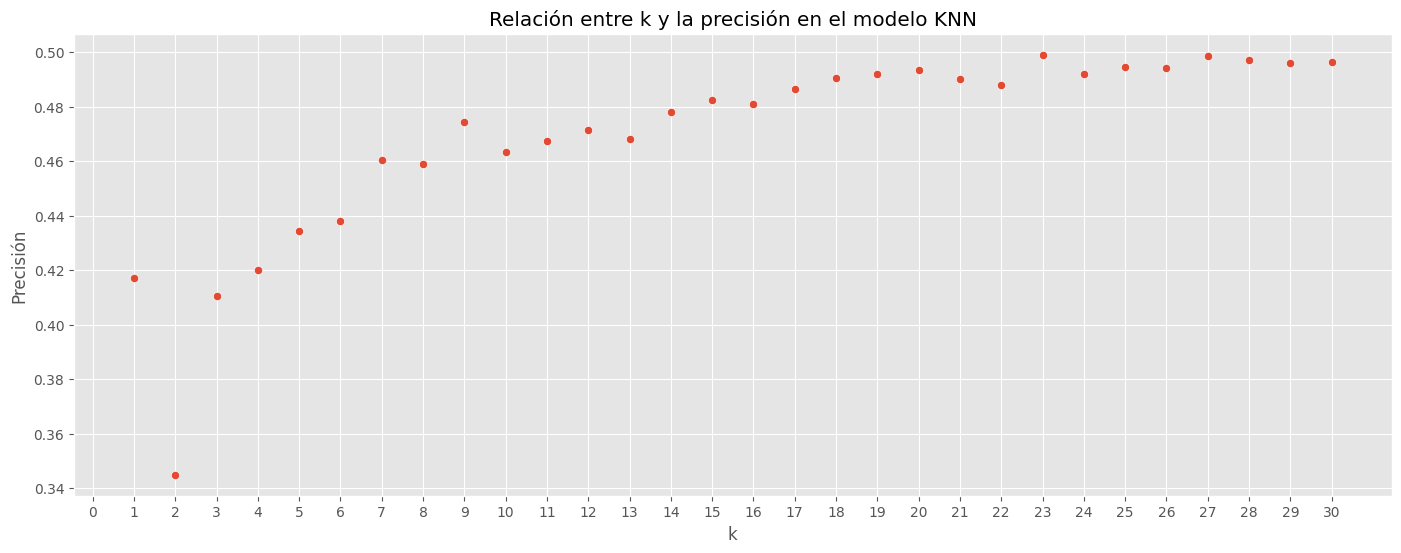

In [ ]:
plt.figure(figsize = (17, 6))
sns.scatterplot(x=k_range, y=scores)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Relación entre k y la precisión en el modelo KNN")
plt.xticks(np.arange(0, 31))
plt.show();

**Incluso haciendo observando los K valores hasta 60, no sube más allá del 51...52% de precisión.**

In [ ]:
# Evaluando el modelo

print('Accuracy de KNN classifier sobre los datos de entrenamiento: {:.2f}'
     .format(knn.score(X_train_scal, y_train)))
print('Accuracy de KNN classifier sobre los datos de test: {:.2f}'
     .format(knn.score(X_test_scal, y_test)))

Accuracy de KNN classifier sobre los datos de entrenamiento: 0.53
Accuracy de KNN classifier sobre los datos de test: 0.50


In [ ]:
# Matriz de confusión

pred = knn.predict(X_test_scal)
print(confusion_matrix(y_test, pred))
print(' ')
print('-'*50)
print(' ')
print(classification_report(y_test, pred))

[[ 44   8  27  14  20]
 [ 25  12  31  21  27]
 [ 25  10  40  57 125]
 [ 10   8  43 125 370]
 [  4   1  33 148 772]]
 
--------------------------------------------------
 
              precision    recall  f1-score   support

         1.0       0.41      0.39      0.40       113
         2.0       0.31      0.10      0.15       116
         3.0       0.23      0.16      0.19       257
         4.0       0.34      0.22      0.27       556
         5.0       0.59      0.81      0.68       958

    accuracy                           0.50      2000
   macro avg       0.37      0.34      0.34      2000
weighted avg       0.45      0.50      0.46      2000



In [ ]:
# Guardar el modelo
import pickle

with open('knn_model.pkl', "wb") as archivo_salida:
    pickle.dump(knn, archivo_salida)

In [ ]:
y_test.to_csv('./y_test.csv', encoding='utf-8', index=False)

In [ ]:
X_test.to_csv('./X_test.csv', encoding='utf-8', index=False)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

### Decission Tree

In [ ]:
# Entrenamiento del modelo

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dtr.score(X_train, y_train)


0.9279638964287991

In [ ]:
y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 -0.21671684633707788
MAE 0.8932562229437229
MAPE 0.31562730970418473
MSE 1.6349936801866065
RMSE 1.2786687140094601


In [ ]:
# Guardar el modelo
import pickle

with open('dtr_model.pkl', "wb") as archivo_salida:
    pickle.dump(dtr, archivo_salida)

----------------------------------------------------------------------------------

In [ ]:
# ARBOL DE DECISION
grid_arbol = {"max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }

In [ ]:
# Realizar GridSearchCV
grid_search = GridSearchCV(dtr, grid_arbol, cv=10)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)

# Imprimir la puntuación de precisión media
print("Precisión media: ", grid_search.best_score_)

Mejores parámetros:  {'max_depth': 6}
Precisión media:  0.3536170239345015


In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6)

In [ ]:
dtr_2 = DecisionTreeRegressor(max_depth=6)
dtr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [ ]:
dtr_2.score(X_train, y_train)


0.4009096652754798

In [ ]:
y_pred = dtr_2.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.34020146436903087
MAE 0.7414201979069537
MAPE 0.2752522875754046
MSE 0.8866207772175055
RMSE 0.9416054254397144


In [ ]:
dtr_3 = DecisionTreeRegressor()

parameters = {"max_depth": [2,3,4,5],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2,5,10,15],
              "min_samples_leaf": [2,4,6,8,10],
              "max_features": [1,2,3,4]          
             }

dtr_gs = GridSearchCV(dtr_3, parameters, cv=10, scoring="neg_mean_absolute_error")

In [ ]:
dtr_gs.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [ ]:
dtr_gs.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=2,
                      min_samples_leaf=6)

In [ ]:
dtr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [ ]:
dtr_gs.best_score_

-0.665625

In [ ]:
mean_absolute_error(y_test, dtr_gs.best_estimator_.predict(X_test))


0.67

In [ ]:
dtr = DecisionTreeRegressor(max_depth=5, max_features=2, min_samples_leaf=6, min_samples_split=2)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.33645359445593337
MAE 0.7462893912961525
MAPE 0.27890599763782925
MSE 0.891657071109978
RMSE 0.9442759507209627


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

### Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scal, y_train)

LogisticRegression()

In [ ]:
log_reg_cv = LogisticRegression()

cv_results = cross_val_score(log_reg_cv, X_train_scal, y_train, cv=5, scoring="accuracy")

In [ ]:
cv_results


array([0.500625, 0.485   , 0.493125, 0.495625, 0.486875])

In [ ]:
cv_results.mean()


0.49225

In [ ]:
cv_results.std()


0.005722761571129794

In [ ]:
y_pred = log_reg.predict(X_test_scal)


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
conf_mat

array([[0.28318584, 0.        , 0.23893805, 0.22123894, 0.25663717],
       [0.10344828, 0.        , 0.22413793, 0.29310345, 0.37931034],
       [0.04280156, 0.        , 0.11673152, 0.17898833, 0.6614786 ],
       [0.01258993, 0.        , 0.03057554, 0.11510791, 0.84172662],
       [0.00417537, 0.        , 0.00417537, 0.05219207, 0.9394572 ]])

In [ ]:
accuracy_score(y_test, y_pred)


0.513

In [ ]:
# Matriz de confusión

pred = log_reg.predict(X_test_scal)
print(confusion_matrix(y_test, pred))
print(' ')
print('-'*50)
print(' ')
print(classification_report(y_test, pred))

[[ 32   0  27  25  29]
 [ 12   0  26  34  44]
 [ 11   0  30  46 170]
 [  7   0  17  64 468]
 [  4   0   4  50 900]]
 
--------------------------------------------------
 
              precision    recall  f1-score   support

         1.0       0.48      0.28      0.36       113
         2.0       0.00      0.00      0.00       116
         3.0       0.29      0.12      0.17       257
         4.0       0.29      0.12      0.17       556
         5.0       0.56      0.94      0.70       958

    accuracy                           0.51      2000
   macro avg       0.32      0.29      0.28      2000
weighted avg       0.41      0.51      0.42      2000



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_features=2, random_state=seed)

rfc_cv = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy")

In [ ]:
rfc_cv


array([0.44625, 0.4175 , 0.44625, 0.43375, 0.4325 , 0.42875, 0.42375,
       0.43875, 0.45375, 0.44125])

In [ ]:
rfc_cv.mean()


0.43624999999999997

In [ ]:
rfc_cv.std()


0.010591860082157421

In [ ]:
parameters = {"n_estimators":[50,100,150],
              "max_depth": [3,4,5],
              "min_samples_split": [4,8,12]
              }

rf_gs = GridSearchCV(rfc, parameters, cv=5, scoring="neg_mean_squared_error")

rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 100}

In [ ]:
rfc_2 = RandomForestClassifier(max_depth=5, min_samples_split=8, n_estimators=100)

rfc_2.fit(X_train, y_train)

y_pred = rfc_2.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

Accuracy 0.515
MSE 1.242
